# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset

In [2]:
df = pd.read_csv("Cust_Spend_Data.csv")

In [3]:
df.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [4]:
df.shape

(10, 7)

In [5]:
df

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [6]:
X = df[df.columns[2:]]

In [7]:
from scipy.stats import zscore

In [8]:
X_scaled = X.apply(zscore)

In [9]:
X_scaled

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


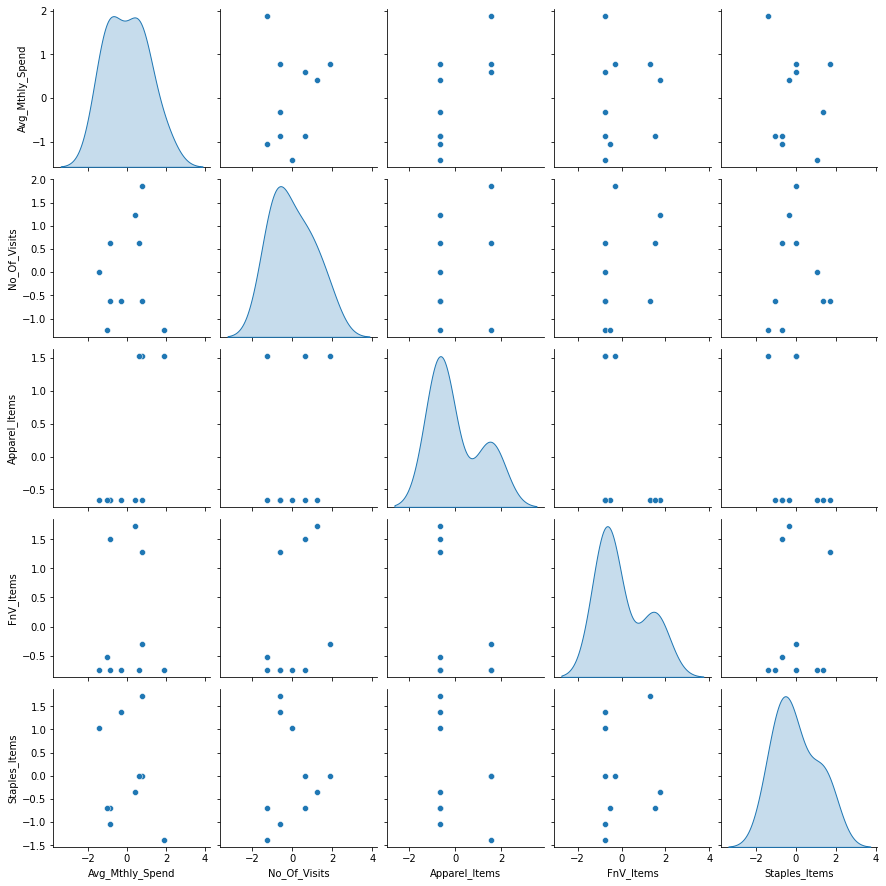

In [13]:
sns.pairplot(X_scaled, diag_kind="kde")

# Machine Learning

### Agglomerative Clustering

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
model = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")

In [16]:
model.fit(X_scaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [17]:
df["labels"] = model.labels_

In [18]:
df

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,1,A,10000,2,1,1,0,0
1,2,B,7000,3,0,10,9,1
2,3,C,7000,7,1,3,4,0
3,4,D,6500,5,1,1,4,0
4,5,E,6000,6,0,12,3,1
5,6,F,4000,3,0,1,8,2
6,7,G,2500,5,0,11,2,1
7,8,H,2500,3,0,1,1,2
8,9,I,2000,2,0,2,2,2
9,10,J,1000,4,0,1,7,2


In [19]:
df.groupby(by="labels").mean()

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,,
0,2.666667,7833.333333,4.666667,1.0,1.666667,2.666667
1,4.666667,5166.666667,4.666667,0.0,11.000000,4.666667
2,8.250000,2375.000000,3.000000,0.0,1.250000,4.500000


In [20]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [25]:
Z = linkage(X_scaled, metric="euclidean", method="average")
c, coph_dists = cophenet(Z, pdist(X_scaled))
c

0.8681149436293064

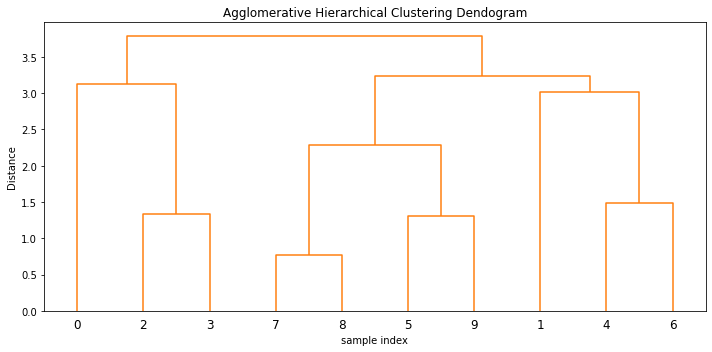

In [39]:
plt.figure(figsize=(10, 5))
dendrogram(Z, color_threshold=40)
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
plt.tight_layout()

In [41]:
Z = linkage(X_scaled, metric="euclidean", method="complete")
c, coph_dists = cophenet(Z, pdist(X_scaled))
c

0.8606955190809153

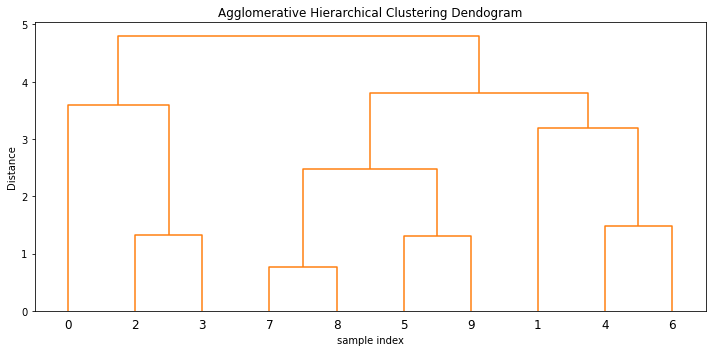

In [43]:
plt.figure(figsize=(10, 5))
dendrogram(Z, color_threshold=90)
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
plt.tight_layout()

In [44]:
Z = linkage(X_scaled, metric="euclidean", method="ward")
c, coph_dists = cophenet(Z, pdist(X_scaled))
c

0.8453818941339526

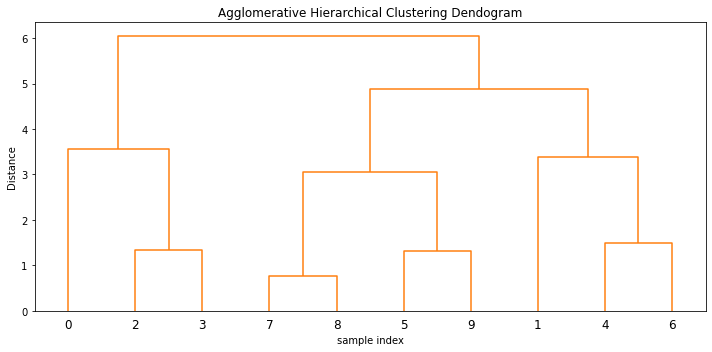

In [45]:
plt.figure(figsize=(10, 5))
dendrogram(Z, color_threshold=600)
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
plt.tight_layout()